In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
test_data=pd.read_csv("Test.csv")

In [4]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
no_need= ['Item_Identifier','Outlet_Identifier']

In [6]:
test_data.drop(no_need,axis=1,inplace=True)

In [7]:
test_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


In [9]:
test_data.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
null_percent = ((test_data.isnull().sum() / test_data.shape[0]) * 100).sort_values(ascending = False)

In [11]:
null_percent

Outlet_Size                  28.269671
Item_Weight                  17.180074
Outlet_Type                   0.000000
Outlet_Location_Type          0.000000
Outlet_Establishment_Year     0.000000
Item_MRP                      0.000000
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Fat_Content              0.000000
dtype: float64

In [12]:
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace = True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].median(), inplace = True)

In [14]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Numerical Column analysis

In [15]:
numerical_columns=test_data.select_dtypes(exclude='object')

In [16]:
names_columns=numerical_columns.columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

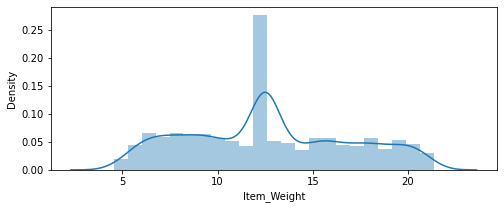

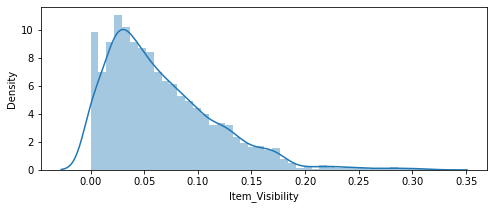

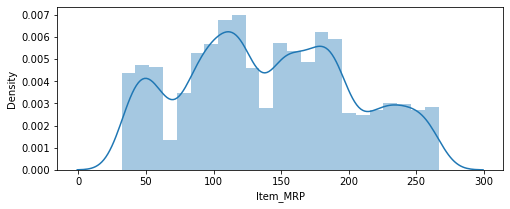

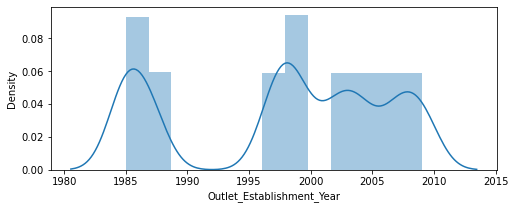

In [18]:
for i in names_columns:
    plt.figure(figsize=(8,3))
    sns.distplot(test_data[i])

## one more question , label columns is missing why ?


In [19]:
## Item_Outlet_Sales

In [21]:
test_data['Item_Visibility']=np.sqrt(test_data['Item_Visibility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

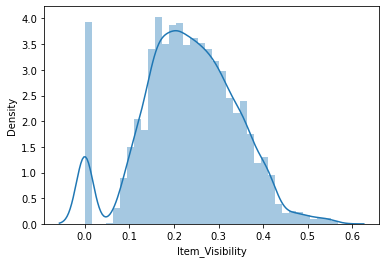

In [22]:
sns.distplot(test_data['Item_Visibility'])

## Categorical Data Analysis

In [23]:
categorical_data=test_data.select_dtypes(include="object")

In [24]:
column_names=categorical_data.columns

In [25]:
column_names

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

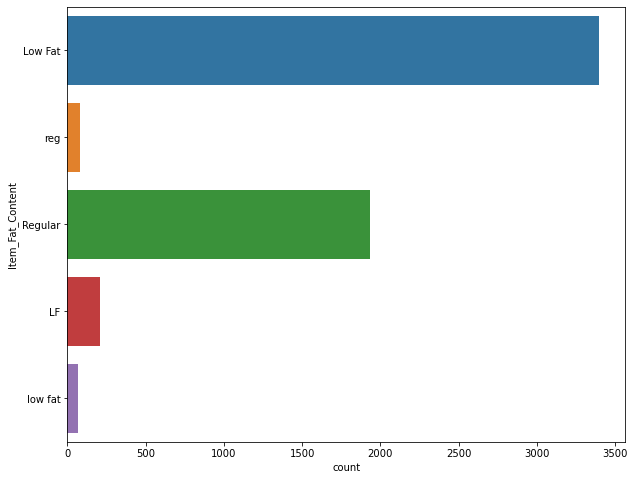

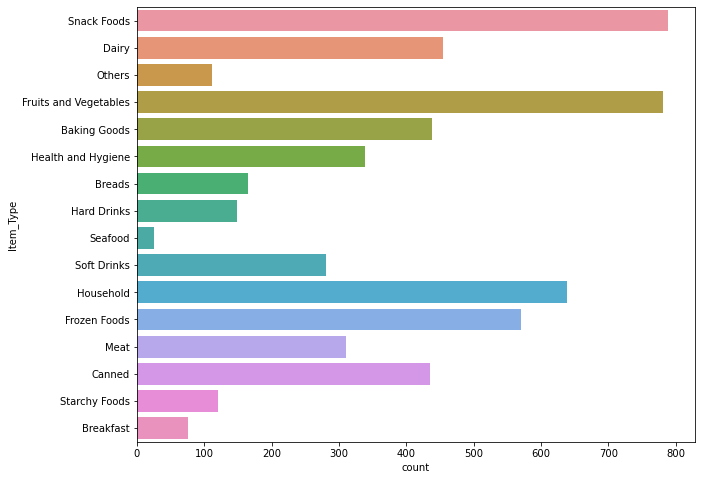

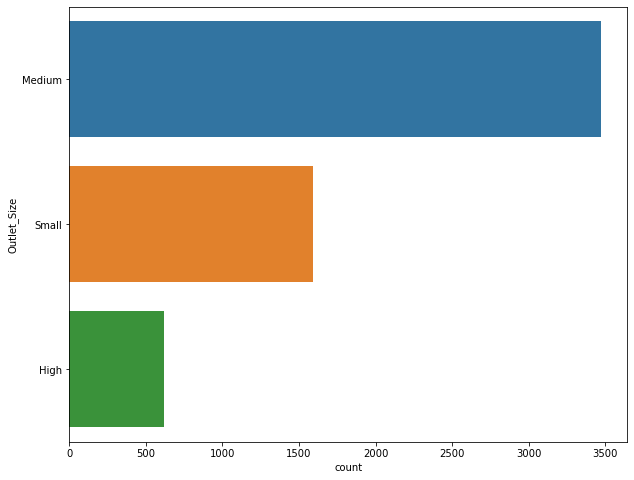

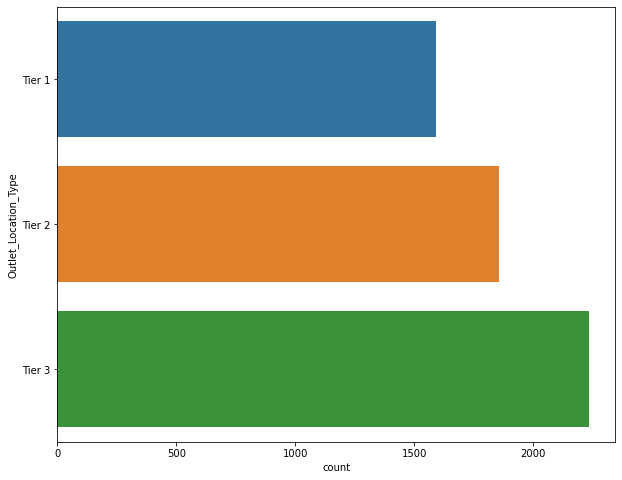

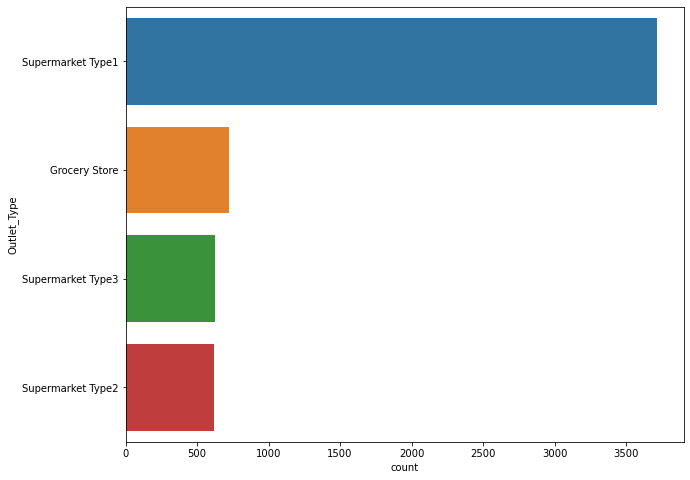

In [26]:
for i in column_names:
    plt.figure(figsize = (10,8))
    sns.countplot( y = i, data = categorical_data);

In [28]:
for i in column_names:
    print(test_data[i].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [29]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({"low fat": "Low Fat",
                                                           "Low Fat": "Low Fat",
                                                         "LF":"Low Fat",
                                                         "Regular":"Regular",
                                                         "reg":"Regular"})

In [30]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## Applying Encoding in the Categorical Variable

In [32]:
test_data['Outlet_Size'].unique()
from sklearn import preprocessing
L_encoder=preprocessing.LabelEncoder()
test_data['Outlet_Size']=L_encoder.fit_transform(test_data['Outlet_Size'])

In [33]:
test_data['Outlet_Size']

0       1
1       1
2       1
3       1
4       1
       ..
5676    2
5677    1
5678    1
5679    1
5680    1
Name: Outlet_Size, Length: 5681, dtype: int32

In [35]:
final_Data=pd.get_dummies(test_data,drop_first=True)

In [36]:
final_Data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.086976,107.8622,1999,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,8.300,0.196030,87.3198,2007,1,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,14.600,0.315555,241.7538,1998,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,7.315,0.124050,155.0340,2007,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,12.500,0.344383,234.2300,1985,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.116174,141.3154,1997,2,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5677,7.600,0.378141,169.1448,2009,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5678,10.000,0.271162,118.7440,2002,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5679,15.300,0.000000,214.6218,2007,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(final_Data)
X_test_scaled = pd.DataFrame(data = X_test, columns = final_Data.columns)

In [41]:
X_test_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.905090,-1.370837,-0.536555,0.139891,-0.284737,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,...,-0.141167,-0.066484,2.490031,-0.228116,-0.147521,-0.696584,-0.804750,0.726900,-0.349374,-0.351274
1,-1.027457,-0.347608,-0.868937,1.095512,-0.284737,1.349873,-0.172954,-0.116445,-0.287959,3.393113,...,-0.141167,-0.066484,-0.401601,-0.228116,-0.147521,1.435578,-0.804750,0.726900,-0.349374,-0.351274
2,0.456482,0.773872,1.629848,0.020438,-0.284737,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,...,7.083797,-0.066484,-0.401601,-0.228116,-0.147521,-0.696584,1.242623,-1.375706,-0.349374,-0.351274
3,-1.259469,-1.022980,0.226697,1.095512,-0.284737,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,...,-0.141167,-0.066484,2.490031,-0.228116,-0.147521,1.435578,-0.804750,0.726900,-0.349374,-0.351274
4,-0.038164,1.044355,1.508110,-1.532446,-0.284737,1.349873,-0.172954,-0.116445,-0.287959,3.393113,...,-0.141167,-0.066484,-0.401601,-0.228116,-0.147521,-0.696584,1.242623,-1.375706,-0.349374,2.846782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.509256,-1.096876,0.004727,-0.099015,1.381166,1.349873,-0.172954,-0.116445,-0.287959,-0.294715,...,-0.141167,-0.066484,2.490031,-0.228116,-0.147521,-0.696584,-0.804750,0.726900,-0.349374,-0.351274
5677,-1.192339,1.361107,0.455014,1.334417,-0.284737,1.349873,-0.172954,-0.116445,-0.287959,-0.294715,...,-0.141167,-0.066484,-0.401601,-0.228116,6.778673,-0.696584,1.242623,-1.375706,2.862264,-0.351274
5678,-0.627029,0.357337,-0.360485,0.498248,-0.284737,-0.740811,-0.172954,-0.116445,-0.287959,-0.294715,...,-0.141167,-0.066484,-0.401601,-0.228116,-0.147521,1.435578,-0.804750,0.726900,-0.349374,-0.351274
5679,0.621365,-2.186915,1.190844,1.095512,-0.284737,1.349873,-0.172954,-0.116445,3.472718,-0.294715,...,-0.141167,-0.066484,-0.401601,-0.228116,-0.147521,1.435578,-0.804750,0.726900,-0.349374,-0.351274


In [44]:
X_test_scaled.to_csv("final_test.csv",index=False)